## Problem Statement

### Context


Digital Ads Data:
The ads24x7 is a Digital Marketing company which has now got seed funding of $10
Million. They are expanding their wings in Marketing Analytics. They collected data from
their Marketing Intelligence team and now wants you (their newly appointed data
analyst) to segment type of ads based on the features provided. Use Clustering
procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.


## Importing necessary libraries

In [40]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from scipy import stats


# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#importing PCA and TSNE
from sklearn.decomposition import PCA

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from scipy import stats

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [4]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Mounted at /content/drive


## Loading the dataset

In [99]:
data = pd.read_excel('/content/drive/MyDrive/Python Course/Clustering+Clean+Ads_Data.xlsx')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [100]:
# checking shape of the data

print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 23066 rows and 19 columns.


### Displaying few rows of the dataset

In [101]:
# viewing the first 5 rows of the data
data.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


### Creating a copy of original data

In [8]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the data types of the columns for the dataset

In [9]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [11]:
df.duplicated().sum()

0

In [12]:
# checking the number of unique values in each column
data.nunique()

Timestamp                 2018
InventoryType                7
Ad - Length                  6
Ad- Width                    5
Ad Size                      7
Ad Type                     14
Platform                     3
Device Type                  2
Format                       2
Available_Impressions    21560
Matched_Queries          20919
Impressions              20405
Clicks                   12752
Spend                    20467
Fee                          7
Revenue                  20578
CTR                       2066
CPM                       2084
CPC                        194
dtype: int64

### Checking the missing values

In [13]:
# checking for missing values
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

#Treat missing values in CPC, CTR and CPM using the formula given
#### To treat the missing values we calculate CPC, CTR and CPM with the help of the formula
• CPC = Total Cost (spend) / Number of Clicks
• CTR = Total Measured Clicks / Total Measured Ad Impressions x 100
• CPM = (Total Campaign Spend / Number of Impressions) * 1,000

In [15]:
def calculate_CPC(x):
  Total_Cost=df.Spend
  Number_of_clicks=df.Clicks
  CPC = (Total_Cost/(Number_of_clicks))
  return CPC
df['CPC'] = df[['CPC']].apply(lambda x: calculate_CPC(x))


In [16]:
def calculate_CTR(x):
  Total_Measured_Clicks=df.Clicks
  Total_Measured_Impressions=df.Available_Impressions
  CTR = (Total_Measured_Clicks/(Total_Measured_Impressions)*100)
  return CTR
df['CTR'] = df[['CTR']].apply(lambda x: calculate_CTR(x))

In [17]:
def calculate_CPM(x):
  Total_Campaign_Spend=df.Spend
  Total_Measured_Impressions=df.Impressions
  CPM = (Total_Campaign_Spend/(Total_Measured_Impressions)*100)
  return CPM
df['CPM'] = df[['CPM']].apply(lambda x: calculate_CPM(x))

In [18]:
# Check once again null values
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [19]:
# Moving  CTR CPM and CPM in different DF

df1 = df[['CTR', 'CPM','CPC']]
#data = data.drop(['car name'], axis=1)

In [20]:
df1.head()

,CTR,CPM,CPC
0,0.055371,0.0,0.0
1,0.056180,0.0,0.0
2,0.036670,0.0,0.0
3,0.041152,0.0,0.0
4,0.082102,0.0,0.0


##Check for outliers:

CTR
Skew : 4.29


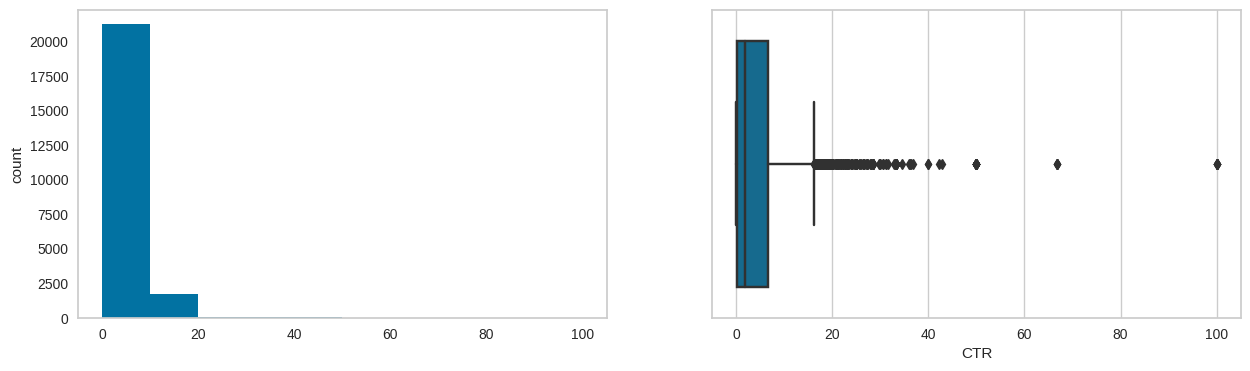

CPM
Skew : 22.32


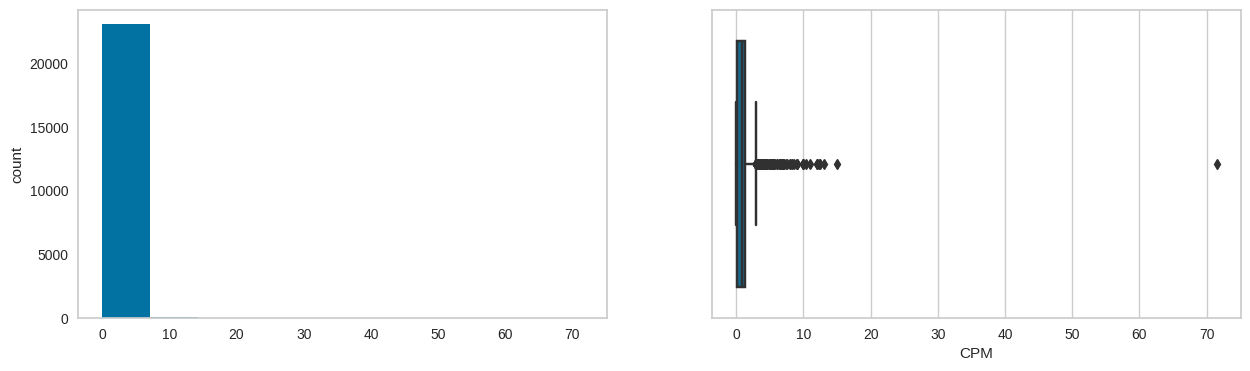

CPC
Skew : 1.84


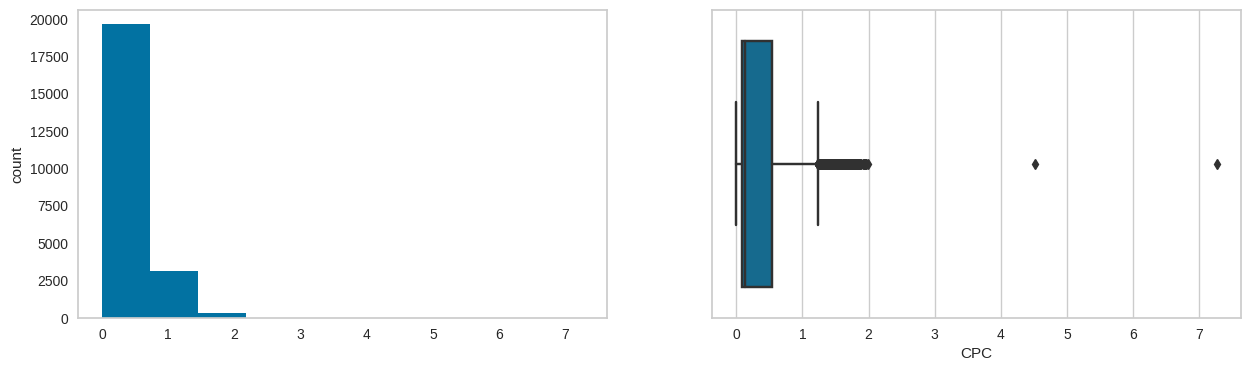

In [21]:
for col in df1.columns:
    print(col)
    print('Skew :',round(df1[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df1[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [22]:
def treat_outliers_iqr(data_with_outliers):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = data_with_outliers.quantile(0.25)
    Q3 = data_with_outliers.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use np.clip to treat outliers for the entire DataFrame
    data = data_with_outliers.apply(lambda x: np.clip(x, lower_bound[x.name],
                                                      upper_bound[x.name]))

    return data

In [ ]:
treat_outliers_iqr(df1)

,CTR,CPM,CPC
0,0.055371,0.000000,0.00
1,0.056180,0.000000,0.00
2,0.036670,0.000000,0.00
3,0.041152,0.000000,0.00
4,0.082102,0.000000,0.00
...,...,...,...
23061,16.243778,2.998142,0.07
23062,16.243778,2.000000,0.04
23063,16.243778,2.998142,0.05
23064,14.285714,2.998142,0.07


In [23]:
my_list = ['a', 'b', 'c']
for i, j in enumerate(my_list):
  print(i, j)

0 a
1 b
2 c


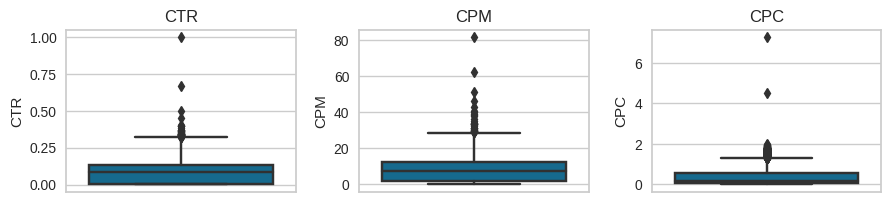

In [24]:
plt.figure(figsize = (12,4))
for i, col in enumerate(df1.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)  # Add column name as title

plt.tight_layout()
plt.show()

Checking Correlation

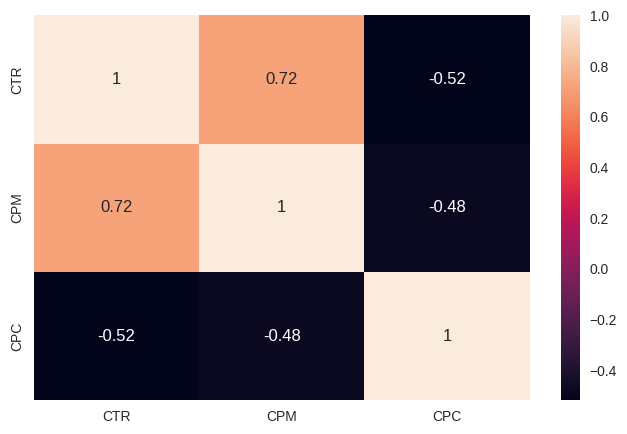

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df1.corr(), annot=True)
plt.show()

###Perform z-score scaling
Z = x – mean / Std Dev

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

In [46]:
data_scaled.head()

,CTR,CPM,CPC
0,-0.747206,-0.927054,-0.986615
1,-0.747045,-0.927054,-0.986615
2,-0.750919,-0.927054,-0.986615
3,-0.750029,-0.927054,-0.986615
4,-0.741898,-0.927054,-0.986615


Z-score scaling standardizes the data by subtracting the mean and dividing by the standard deviation. This can make the data more comparable and can improve the performance of clustering algorithms. However, it can also slow down the algorithm if the dataset is very large.

##Perform clustering and do the following:
###(A)Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance

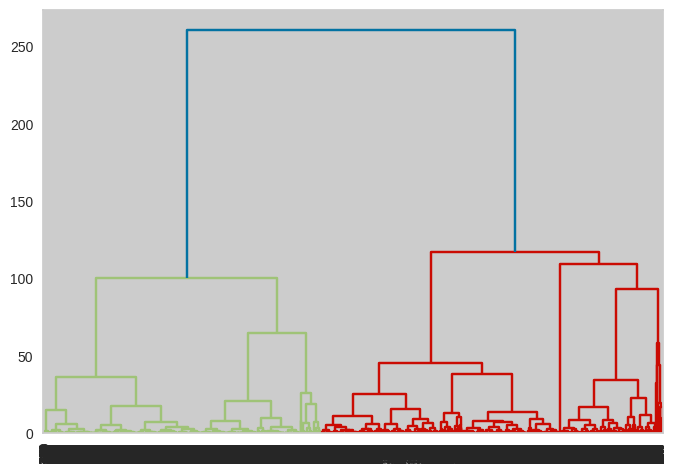

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform linkage
linkage_matrix = linkage(data_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
dendrogram(linkage_matrix)
plt.show()

###(B)Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm:

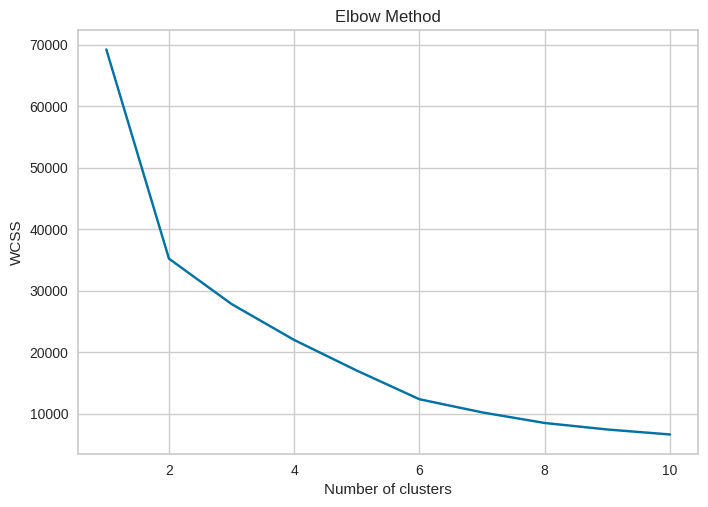

In [51]:
# Create an empty list to store the WCSS values
wcss = []

# Perform KMeans for n=1 to n=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

#Plot the Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###(C)Print silhouette scores for up to 10 clusters and identify optimum number of clusters:

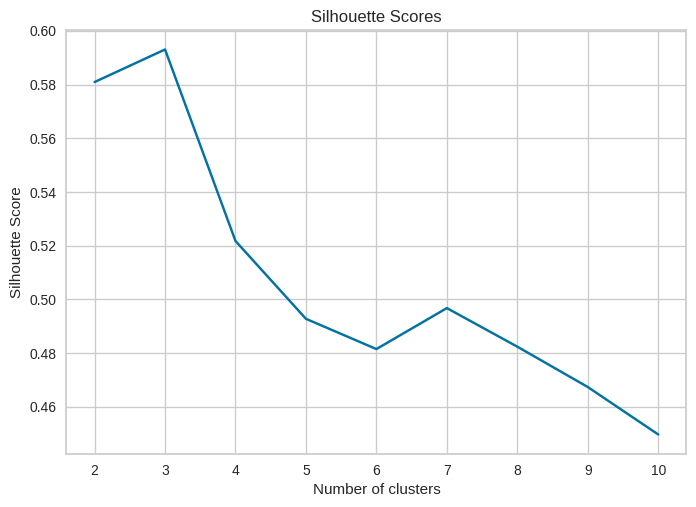

In [52]:
# Create an empty list to store the silhouette scores
silhouette_scores = []

# Perform KMeans for n=2 to n=10
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [76]:
wccs = []
for i in range (2,11):
    kmeans = KMeans(n_clusters = i,random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [77]:
for i in range(2,11):
  print('The WSS Value for',i,'Cluster is ',wcss[i-2])

The WSS Value for 2 Cluster is  69197.9999999998
The WSS Value for 3 Cluster is  35207.357285089485
The WSS Value for 4 Cluster is  27830.27819782109
The WSS Value for 5 Cluster is  21991.60941078634
The WSS Value for 6 Cluster is  17016.98133651621
The WSS Value for 7 Cluster is  12361.363629238045
The WSS Value for 8 Cluster is  10228.814026685915
The WSS Value for 9 Cluster is  8504.369209650378
The WSS Value for 10 Cluster is  7448.087166927873


##7.Profile the ads based on optimum number of clusters using silhouette score and your domain understanding:

In [73]:
# Identify the optimum number of clusters
optimum_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(optimum_clusters)
# Perform KMeans with the optimum number of clusters
kmeans = KMeans(n_clusters=optimum_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Add the cluster labels to the data
data['Cluster'] = kmeans.labels_

# Group the data by clusters and take sum or mean to identify trends
cluster_data = data.groupby(['Cluster']).mean()




3


In [79]:
cluster_data.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
Cluster,,,,,,,,,,,,,
0,438.737228,171.464027,63197.805891,5.165329e+06,2.726854e+06,2.633884e+06,6383.208402,4295.269384,0.326236,3088.291780,0.003323,1.703330,0.627382
1,340.620690,473.651022,123657.088123,2.083759e+05,1.306020e+05,1.087975e+05,14384.643040,1433.056880,0.342252,990.216139,0.137076,13.050454,0.100662
2,403.016393,461.748634,143737.704918,4.473224e+01,2.875410e+01,2.762295e+01,9.748634,0.967650,0.350000,0.628918,0.449220,42.311000,0.097000


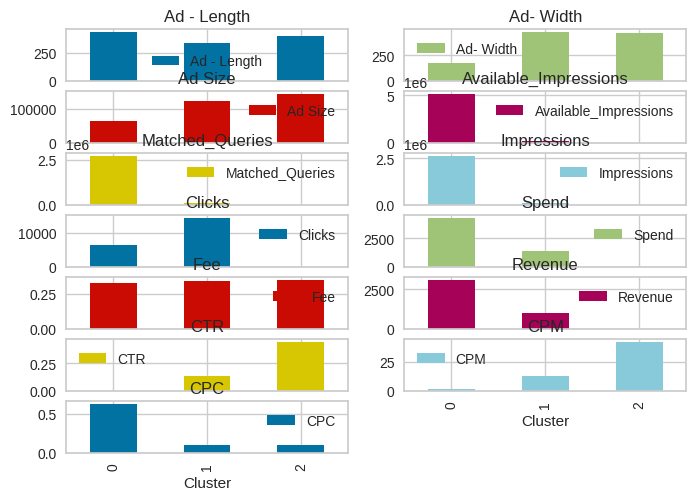

In [98]:
# Make bar plots for each cluster
cluster_data.plot(kind='bar', subplots=True, layout=(7,2), sharex=False, sharey=False)
plt.show()

##8. Conclude the project by providing summary of your learnings:

In this project, we used clustering techniques to segment digital ads data into homogeneous groups based on the features of CPM, CPC and CTR. We first performed basic data analysis, treated missing values, checked for outliers and scaled the data using z-score scaling. We then performed hierarchical clustering and used the elbow plot and silhouette scores to identify the optimum number of clusters. Finally, we profiled the ads based on the optimum number of clusters and identified trends in clicks, spend, revenue, CPM, CTR and CPC based on Device Type.

##Principal Component Analysis

In [32]:
#Defining the number of principal components to generate
n=data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [33]:
exp_var

array([0.71657848, 0.18923892, 0.09418261])